## Import Important Libaries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import time 
import os

import geopy
from geopy.geocoders import Nominatim

%matplotlib inline

## Dataframe detail informations 

In [2]:
"""
Just uncomment and run the program the code to view the details required
"""

df = pd.read_csv('data_100000.csv')

# df.head()           # view the dataframe
# df.info()           # view the columns data types and row nan details
# df.describe()       # view the dataframe mean, count, std, and other statics
# df.dtypes           # view the columns data types
# df.columns          # view the name of every avaliable dataframe column names.

In [3]:
print(df.latitude.isnull().sum())
print(df.longitude.isnull().sum())
print(df.zip_code.isnull().sum())

8035
8035
35034


## Address to Longtitude and Latitude

In [42]:
def lat_long(address):
    
    # GeoPy to get longtitude and latitude 
    geolocator = Nominatim(user_agent="Address_GeoLocator")
    location = geolocator.geocode(address)
    lat_long = [location.latitude, location.longitude]
    return lat_long

## Longtitude and Latitude to Address

In [41]:
def reverse_address(latitude, longitude):
    
    # GeoPy to get addresses 
    geolocator = Nominatim(user_agent="Geo_AddressLocator")
    geo_code = geolocator.reverse(f"{str(latitude)}, {str(longitude)}")
    adrs = geo_code.raw
    adrs = adrs['address']
    return adrs

In [11]:
# Filling null value of address consume lot s time and memory so save address into new dire to work fresh.

if not os.path.exists("data_files"):
    os.makedirs("data_files")

## Fill null value of 
---
* zip_code
* borough
* on_street_name

using "latitude" and "longitude"

In [13]:
zip_list = df[(df.latitude.isnull()) & (df.zip_code.notnull())].index.tolist()
geo_list = df[(df.latitude.notnull()) & (df.on_street_name.isnull())].index.tolist()

print(len(zip_list))
print(len(geo_list))

1836
0


In [15]:
geo_list = df[(df.latitude.notnull()) & (df.on_street_name.isnull())].index.tolist()
per_loop_data = 50
total_loop = int((len(geo_list)/per_loop_data)+1)

error_limit = 0  

print("Total null values", len(geo_list))

while True:
    for attempt in range(total_loop):
        
        try:
            geo_list = df[(df.latitude.notnull()) & (df.on_street_name.isnull())].index.tolist()
            for ind in geo_list[:per_loop_data]:
                lat = df.latitude[df.index == ind].values[0]     # grab latitude
                lon = df.longitude[df.index == ind].values[0]    # grab longitude

                adrs = reverse_address(lat, lon)

                
                try:
                    zip_code = adrs['postcode']               # save postcode
                except:
                    zip_code = None
                
                try:
                    bor = adrs["suburb"]                     # save borough
                except:
                    zip_code = None
                
                try:
                    street = adrs['road']                    # save streetname
                except:
                    zip_code = None
                """
                zip_code = adrs['postcode']
                bor = adrs["suburb"]
                street = adrs['road']
                """
                # fill the gather information in its respective cell
                df.loc[ind,"zip_code"] = zip_code
                df.loc[ind,"borough"] = bor
                df.loc[ind,"on_street_name"] = street
                
            error_limit = 0
            print(len(geo_list))
        
        except Exception as e: 
            error_limit += 1
            if error_limit > 5:        # if error limit exceed break the loop and analysis the error
                break
            
            print(e)
            print("Error!! Re-attempt")
            print(len(geo_list))
            
            time.sleep(3)
            
    if len(geo_list) == 0 or error_limit > 5:
        break
    
print("End of the process", len(geo_list))

Total null values 1
1
0
End of the process 0


## Filling address data consumes lots of time so save the .csv file

In [12]:
df.to_csv(r'./data_files/data_clean_GOOD_ENOUGH.csv', index=False)
df = pd.read_csv(r'./data_files/data_clean_GOOD_ENOUGH.csv')

## Fill null value of 
---
* latitude
* longitude

using "zip_code" and "borough"

In [18]:
zip_list = df[(df.latitude.isnull()) & (df.zip_code.notnull())].index.tolist()
per_loop_data = 25
total_loop = int((len(zip_list)/per_loop_data)+1)

error_limit = 0   

print("Total null values", len(zip_list))

while True:
    for attempt in range(total_loop):
        
        try:
            zip_list = df[(df.latitude.isnull()) & (df.zip_code.notnull())].index.tolist()
            for ind in zip_list[:per_loop_data]:
                bor = df.borough[df.index == ind].values        # grab the borough 
                zip_code = df.zip_code[df.index == ind].values  # grab the zip_code
                codi = lat_long(f"{zip_code} {bor} NYC")        # get the corrdination
                df.loc[ind,"latitude"] = codi[0]
                df.loc[ind,"longitude"] = codi[1]
            
            error_limit = 0
            print(len(zip_list))
                
        except Exception as e: 
            error_limit += 1
            if error_limit > 5:   # if error limit exceed break the loop and analysis the error
                break
                
            print(e)
            print("Error!! Re-attempt")
            print(len(zip_list))
            time.sleep(3)
            
    
    if len(zip_list) == 0 or error_limit > 5:
        break
    
print("End of the process", len(zip_list))

Total null values 1835
'NoneType' object has no attribute 'latitude'
Error!! Re-attempt
1835
'NoneType' object has no attribute 'latitude'
Error!! Re-attempt
1835
'NoneType' object has no attribute 'latitude'
Error!! Re-attempt
1835
'NoneType' object has no attribute 'latitude'
Error!! Re-attempt
1835
'NoneType' object has no attribute 'latitude'
Error!! Re-attempt
1835
End of the process 1835


In [ ]:
df.to_csv(r'./data_files/data_clean_GOOD_ENOUGH.csv', index=False)

In [44]:
print(df.latitude.isnull().sum())
print(df.longitude.isnull().sum())

8034
8034


## Feature engineering time column and  to gather view data in new prespective

In [45]:
df = pd.read_csv(r'./data_files/data_clean_GOOD_ENOUGH.csv')

"""
combin the date and time and convert data
type to date type to short accident base 
on time period
"""
df[["period"]] = (df["crash_date"] + ' ' + df["crash_time"])  # combine date and time
df.period = df.period.astype('datetime64[ns]')                # convert column to datetime 


"""
convert the "crash_date" to "datetime" data 
type to futher break data and find futher 
feature like date, data, month
"""
df["crash_date"] = df["crash_date"].astype('datetime64[ns]')  # convert colum to date time format
df["year"] = df["crash_date"].dt.year                         # get the year
df["month"] = df["crash_date"].dt.month                       # get the month
df["day"] = df["crash_date"].dt.day                           # get the day
df["weekday"] = df["crash_date"].dt.weekday                   # figure out which day it was
df["hour"] = pd.to_datetime(df['crash_time'], format='%H:%M').dt.hour  # grabing just hour value

"""
Based on the week days find accident happen
on weekday or on weekend.
"""
df["day_status"] = 0                               # "weekday"
df["day_status"].loc[df['weekday'] >4] = 1         # "weekend"

"""
Based on the month information finding 
at what session more safty needs to be concern.
"""
df["month_status"] = 0                                                      # "fall"
df.loc[(df["month"] < 3) | (df["month"] >= 12), "month_status"] = 1         # "winter"
df.loc[(df["month"] < 6) & (df["month"] >= 3), "month_status"] = 2         # "spring"
df.loc[(df["month"] < 9) & (df["month"] >= 6), "month_status"] = 3         # "summer"

"""
Based on the hour and weekday or weekenday 
finding what high accident chance day and hour.
"""
df["hour_status"] = 0                                                                  # "Evening"
df.loc[(df["hour"] < 18) & (df["day_status"] == "weekday"), "hour_status"] = 1         # "working_hour"
df.loc[(df["hour"] < 7) & (df["day_status"] == "weekday"), "hour_status"] = 2          # "night"
df.loc[(df["hour"] < 16) & (df["day_status"] == "weekday"), "hour_status"] = 3         # "day"
df.loc[(df["hour"] < 7) & (df["day_status"] == "weekday"), "hour_status"] = 4          # "night"

C:\Users\sijal\anaconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
# finding total number of accident victim per row.
df["total_victim"] = df.number_of_persons_injured + df.number_of_persons_killed

##  Null values graphical presentatin and understanding

Drop the column where missing value is above 10% else just remove row
Data size: 100000
Data limit:  10000


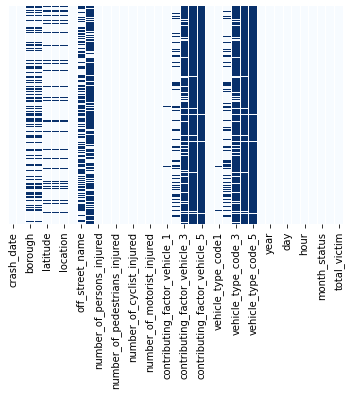

In [47]:
print('Drop the column where missing value is above 10% else just remove row')
print('Data size:', df.shape[0])
print('Data limit: ',int(0.1* df.shape[0]))

sn.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= 'Blues');

In [48]:
df.isna().sum()     # viwe rows with missing values

crash_date                           0
crash_time                           0
borough                          34401
zip_code                         34531
latitude                          8035
longitude                         8035
location                          8035
on_street_name                     830
off_street_name                  52875
cross_street_name                74033
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      371
contributing_factor_vehicle_2    19243
contributing_factor_vehicle_3    91239
contributing_factor_vehicle_4    97760
contributing_factor_vehicle_5    99333
collision_id                         0
vehicle_type_code1                 740
vehicle_type_code2       

In [49]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'off_street_name',
       'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'period', 'year', 'month', 'day', 'weekday', 'hour', 'day_status',
       'month_status', 'hour_status', 'total_victim'],
      dtype='object')

## Replacing null values with values that are present in column

In [50]:
# Replace 'nan' to 'Unspecified'
df["contributing_factor_vehicle_1"] = df["contributing_factor_vehicle_1"].fillna('Unspecified')

# Replace 'nan' to 'Unknown'
df["vehicle_type_code1"] = df["vehicle_type_code1"].fillna('Unknown')


In [51]:
# Listing all the sub-types of vechile listed in dataset

vechiles_subtype = df["vehicle_type_code1"].str.lower().unique().tolist()
vechiles_subtype.sort()
vechiles_subtype

['0',
 '18 wheeler',
 '1c',
 '2 dr sedan',
 '3-door',
 '35 ft',
 '4 dr sedan',
 '4d',
 '4ds',
 'abulance',
 'almbulance',
 'amb',
 'ambu',
 'ambul',
 'ambulace',
 'ambulance',
 'ambulence',
 'appor',
 'armored truck',
 'back',
 'back hoe',
 'backh',
 'backhoe',
 'beverage truck',
 'bike',
 'bobca',
 'bobcat for',
 'box',
 'box t',
 'box truck',
 'boxtr',
 'bs',
 'btm',
 'bucket tru',
 'bulk agriculture',
 'bulld',
 'bus',
 'camper tra',
 'can',
 'cargo van',
 'carry all',
 'cat',
 'cat.',
 'cement tru',
 'chassis cab',
 'chevrolet',
 'chevy expr',
 'city',
 'com',
 'comm.',
 'comme',
 'commercial',
 'concrete mixer',
 'const',
 'cont',
 'convertible',
 'courier',
 'cross',
 'dark color',
 'deliv',
 'delivery',
 'delivery t',
 'delivery v',
 'delv',
 'dilevery t',
 'dirt',
 'dirt bike',
 'dot equipm',
 'drill rig',
 'dump',
 'dump truck',
 'e bik',
 'e bike',
 'e revel sc',
 'e skate bo',
 'e-350',
 'e-bik',
 'e-bike',
 'e-sco',
 'e-scooter',
 'e-unicycle',
 'e450',
 'elec. unic',
 'ele

## Categorizing sub types into sets for better understanding

In [52]:
light = ['3-door','bike', 'carry all', 'dirt', 'dirt bike', 'e bik', 'e bike', 'e revel sc', 'e skate bo', 'e-bik', 'e-bike',
         'e-sco', 'e-scooter', 'e-unicycle', 'elec. unic', 'elect', 'electric s','go kart', 'golf', 'golf cart', 'gator', 'john deere',
        'ut', 'util', 'utili','utility', 'utility ve', 'utility.', 'lawnmower', 'mini', 'minibike', 'minicycle', 'mobil', 'moped', 
        'motor scoo', 'motor skat', 'motorbike', 'motorcycle','pedicab', 'road sweep', 'scoot', 'scooter', 'skateboard', 'slingshot', 
         'small com veh(4 tires) ', 'vespa', ]

medium = ['2 dr sedan',  '4 dr sedan', '4d', '4ds', 'abulance', 'almbulance', 'amb','ambu', 'ambul', 'ambulace', 'ambulance', 
          'ambulence','appor', 'camper tra',  'cargo van', 'chassis cab', 'chevrolet', 'chevy expr', 'city', 'com', 'comm.', 
          'comme', 'commercial', 'convertible', 'courier', 'cross', 'dark color', 'deliv', 'delivery', 
          'delivery v', 'delv', 'dilevery t', 'e-350', 'e450', 'ems', 'enclosed body - nonremovable enclosure', 
          'enclosed body - removable enclosure', 'f-250', 'f150xl pic', 'limo', 'limou', 'ford sprin', 'ford van', 'fusion', 
          'g spc', 'gen  ambul', 'government', 'livestock rack','motorscoot', 'motorscooter', 'moving van',  'parce',  'passenger vehicle', 'paylo',
         'pick up', 'pick up tr', 'pick-', 'pick-up tr', 'pick-up truck', 'picku', 'pickup with mounted camper', 'polic', 'posta',
         'range',  'refrigerated van', 'rmp v',  'sedan', 'smart car', 'sport utility / station wagon', 'sprin', 'stake or rack', 
          'station wagon/sport utility vehicle', 'stree', 'subn whi', 'suburban', 'suv', 'swt',  'taxi',  'uhaul',
         'ups truck', 'us po', 'usps', 'usps posta', 'usps truck', 'usps van', 'usps/govt',  'van', 'van camper', 'van t', 'wh ford co',
         'white', 'white ambu', 'wineb', 'winne', 'work van']

heavy = ['18 wheeler', '35 ft','armored truck', 'back', 'back hoe', 'backh', 'backhoe','beverage truck', 'bobca', 'bobcat for',
         'box', 'box t', 'box truck', 'boxtr', 'bs', 'btm','bucket tru', 'bulk agriculture', 'bulld', 'bus', 'cat', 'cat.',
         'cement tru','concrete mixer', 'const', 'delivery t', 'dot equipm', 'drill rig', 'dump', 'dump truck', 'excav', 
         'f550', 'fd ladder', 'fdny', 'fdny #226', 'fdny ambul', 'fdny ems', 'fdny engin', 'fdny fire', 'fdny ladde', 
         'fdny truck','fire', 'fire engin', 'fire truck', 'firet', 'firetruck', 'firtruck', 'flat', 'flat bed', 'flat rack',
         'flatbed','flatbed fr', 'food truck', 'freig', 'ladder 34',  'lift boom', 'light trai','fork', 'fork lift', 'forkl', 'forklift', 'forlift', 'freig delv', 'freight', 
         'freight fl', 'freight tr', 'front-load', 'garbage or refuse', 'garbage tr', 'lunch wagon', 'mack', 'mail truck', 'mechanical',
         'motorized home', 'mta', 'mta b', 'mta bus', 'multi-wheeled vehicle', 'nyc ambula', 'nyc fd', 'postal bus', 'postal tru', 'power',
        'power shov', 'prks', 'psd', 'pu', 'pumper', 'rv', 'schoo', 'school bus', 'tanker', 'tow t', 'tow truck', 'tow truck / wrecker',
        'tower', 'towtr', 'trac', 'tract', 'tractor', 'tractor tr', 'tractor truck diesel', 'tractor truck gasoline',
        'trail', 'trailer', 'trc', 'trk', 'trl', 'trlr', 'truck', 'truck flat', 'truck van', 'well driller',]

unkown = ['0', '1c', 'hi ta', 'horse', 'hrse', 'j1', 'can', 'cont', 'lcomm', 'leased amb', 'message si','nys a', 'open body', 
          'oth', 'other','p/sh','pas','pc', 'pk', 'unk', 'unkn', 'unkno','unknown', 'refg', 'self', 'tk', 'ltr']

In [53]:
df["vehicle"] = np.nan

"""
unkonwn = 0
light = 1
medium = 2
heavy = 3
"""

for ind in range(df["vehicle"].shape[0]):

    vec = df.loc[ind,"vehicle_type_code1"].lower()

    if vec in light:
        vec_type = 1           # 

    elif vec in medium:
        vec_type = 2

    elif vec in heavy:
        vec_type = 3

    elif vec in unkown:
        vec_type = 4

    else:
        vec_type = None


    df.loc[ind,"vehicle"] = vec_type

In [54]:
df.dtypes

crash_date                       datetime64[ns]
crash_time                               object
borough                                  object
zip_code                                 object
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
off_street_name                          object
cross_street_name                        object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3           

In [55]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,year,month,day,weekday,hour,day_status,month_status,hour_status,total_victim,vehicle
0,2017-04-18,23:10,Staten Island,10312,40.536728,-74.193344,"(40.536728, -74.193344)",Darlington Avenue,NaN,243 DARLINGTON AVENUE,...,2017,4,18,1,23,0,2,0,0,2.0
1,2017-05-06,13:00,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,...,2017,5,6,5,13,1,2,0,1,2.0
2,2017-04-27,17:15,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,...,2017,4,27,3,17,0,2,0,0,2.0
3,2017-05-09,20:10,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,...,2017,5,9,1,20,0,2,0,1,1.0
4,2017-04-18,14:00,The Bronx,10456,40.828846,-73.903120,"(40.828846, -73.90312)",Boston Road,NaN,1167 BOSTON ROAD,...,2017,4,18,1,14,0,2,0,0,2.0


In [56]:
# After attemping to get most of null values and drop columns that doesn't provide much information.

drop_col = ["crash_date", "crash_time", "location",
            "contributing_factor_vehicle_2", "contributing_factor_vehicle_3", 
            "contributing_factor_vehicle_4", "contributing_factor_vehicle_5",
            "vehicle_type_code2", "vehicle_type_code_3","vehicle_type_code_4", "vehicle_type_code_5"]

"""
# After attemping to get most of null values and extra values drop any columns that exceed the 10% null limit

null_limit = 0.1
for i in df.columns:
    if df[f'{i}'].isna().sum() >=  int(null_limit * df.shape[0]):
        drop_col.append(i)
        
df = df.drop(columns=drop_col)
"""

"\n# After attemping to get most of null values and extra values drop any columns that exceed the 10% null limit\n\nnull_limit = 0.1\nfor i in df.columns:\n    if df[f'{i}'].isna().sum() >=  int(null_limit * df.shape[0]):\n        drop_col.append(i)\n        \ndf = df.drop(columns=drop_col)\n"

In [57]:
# Cheeck if there are any dublicate rows
duplicate = df[df.duplicated()] 
print("Duplicate Rows :") 
duplicate

Duplicate Rows :


,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,year,month,day,weekday,hour,day_status,month_status,hour_status,total_victim,vehicle


In [ ]:
df = df.dropna()  # or 'nan' is '0'

In [58]:
for i in df.columns:
    print()
    print(f"********** {i} **********")
    print(df[f'{i}'].unique())
    print(df[f'{i}'].nunique())


********** crash_date **********
['2017-04-18T00:00:00.000000000' '2017-05-06T00:00:00.000000000'
 '2017-04-27T00:00:00.000000000' '2017-05-09T00:00:00.000000000'
 '2017-05-08T00:00:00.000000000' '2017-05-10T00:00:00.000000000'
 '2017-04-24T00:00:00.000000000' '2017-04-14T00:00:00.000000000'
 '2017-05-02T00:00:00.000000000' '2017-05-01T00:00:00.000000000'
 '2017-04-29T00:00:00.000000000' '2017-04-16T00:00:00.000000000'
 '2017-04-25T00:00:00.000000000' '2017-04-22T00:00:00.000000000'
 '2017-04-20T00:00:00.000000000' '2017-04-28T00:00:00.000000000'
 '2017-05-05T00:00:00.000000000' '2017-04-19T00:00:00.000000000'
 '2018-02-17T00:00:00.000000000' '2019-12-04T00:00:00.000000000'
 '2017-09-12T00:00:00.000000000' '2017-05-07T00:00:00.000000000'
 '2017-04-15T00:00:00.000000000' '2017-04-26T00:00:00.000000000'
 '2017-05-04T00:00:00.000000000' '2017-04-23T00:00:00.000000000'
 '2017-05-03T00:00:00.000000000' '2019-11-08T00:00:00.000000000'
 '2019-06-25T00:00:00.000000000' '2020-03-10T00:00:00.00


********** zip_code **********
['10312' '10472.0' '11420.0' nan '10456' '11203.0' '10474' '10301' '11223'
 '11234' '10463.0' '11419.0' '10453.0' '11422' '11207.0' '10019.0'
 '10309.0' '11422.0' '10312.0' '11233.0' '11417.0' '11691.0' '11358'
 '10013.0' '11226.0' '11233' '10002.0' '10038' '10461.0' '11214' '10033.0'
 '11206.0' '11221.0' '10467.0' '10011.0' '10017' '11355' '10027.0' '11378'
 '10314' '11224' '10305.0' '10021.0' '10035.0' '11213.0' '11208' '10036'
 '10463' '11101.0' '10009' '11235' '11377.0' '10470.0' '11219.0' '10001'
 '11228.0' '11215.0' '11234.0' '11217' '11372' '11379.0' '10460.0'
 '11205.0' '10468.0' '11416.0' '10469.0' '11235.0' '11429' '10013' '11231'
 '11236.0' '10459.0' '11434.0' '10470' '10012.0' '11229.0' '10031.0'
 '11238' '11223.0' '11369' '10007.0' '11369.0' '11423' '10026.0' '10018'
 '11365.0' '11429.0' '11370.0' '11421.0' '11209.0' '10465.0' '10025.0'
 '11207' '11101' '11421' '10001.0' '10458.0' '10019' '10308.0' '11375.0'
 '10034' '10017.0' '11221' '10455

 'Alcohol Involvement' 'Passenger Distraction' 'Brakes Defective']
30

********** contributing_factor_vehicle_4 **********
[nan 'Unspecified' 'Following Too Closely'
 'Driver Inattention/Distraction' 'Other Vehicular' 'Unsafe Speed'
 'Reaction to Uninvolved Vehicle' 'Pavement Slippery' 'Obstruction/Debris'
 'Outside Car Distraction' 'Backing Unsafely'
 'Aggressive Driving/Road Rage' 'Alcohol Involvement']
12

********** contributing_factor_vehicle_5 **********
[nan 'Unspecified' 'Following Too Closely' 'Unsafe Speed'
 'Other Vehicular' 'Reaction to Uninvolved Vehicle' 'Pavement Slippery'
 'Driver Inattention/Distraction' 'Obstruction/Debris'
 'Passing Too Closely']
9

********** collision_id **********
[3654181 3665311 3658491 ... 4245290 4243646 4247517]
100000

********** vehicle_type_code1 **********
['Station Wagon/Sport Utility Vehicle' 'Sedan' 'Motorcycle' 'Taxi'
 'Pick-up Truck' 'Ambulance' 'Tractor Truck Diesel' 'Bus' 'Unknown'
 'Box Truck' 'Bike' 'deliv' 'Van' 'tower' 'PAS' 'T

 'FDNY FIRET' 'MTA BUS' 'Pallet']
64

********** vehicle_type_code_4 **********
[nan 'Station Wagon/Sport Utility Vehicle' 'Sedan' 'Taxi' 'Pick-up Truck'
 'Box Truck' 'Lift Boom' 'Tractor Truck Diesel' 'Convertible' 'TOYOT'
 'Motorcycle' 'Bus' 'Ambulance' 'SPORT UTILITY / STATION WAGON'
 'Motorscooter' 'Dump' 'Van' 'Refrigerated Van' 'Bike' 'E-Scooter'
 'FLATBED TR' 'E-Bike' 'trailor' 'CARGO VAN' 'TRAILER' 'LIMO' 'Carry All'
 'Box' '4 dr sedan' 'FDNY' 'Open Body' 'Chassis Cab']
31

********** vehicle_type_code_5 **********
[nan 'Sedan' 'Station Wagon/Sport Utility Vehicle' 'Pick-up Truck' 'Bus'
 'Motorcycle' 'Wagon' 'Taxi' 'back' 'Box Truck' 'Convertible' 'Ambulance'
 'PK' 'Van' 'Tractor Truck Diesel' 'Motorscooter' 'Box truck' 'E-Scooter'
 'BOX Truck']
18

********** period **********
['2017-04-18T23:10:00.000000000' '2017-05-06T13:00:00.000000000'
 '2017-04-27T17:15:00.000000000' ... '2019-12-01T11:22:00.000000000'
 '2019-11-18T17:28:00.000000000' '2019-11-17T20:42:00.000000000']
661

In [59]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'off_street_name',
       'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'period', 'year', 'month', 'day', 'weekday', 'hour', 'day_status',
       'month_status', 'hour_status', 'total_victim', 'vehicle'],
      dtype='object')

In [64]:
df = df[['period','latitude', 'longitude', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'collision_id', 'year', 'month', 'day', 'weekday', 'hour',
       'day_status', 'month_status', 'hour_status', 'total_victim', 'vehicle']]

In [65]:
df = df.sort_values(by=['period'])
df = df.reset_index()
df = df.drop(["index"], axis=1)

In [66]:
df.head()

,period,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,...,year,month,day,weekday,hour,day_status,month_status,hour_status,total_victim,vehicle
0,2013-03-23 21:20:00,40.860198,-73.828790,0,0,0,0,0,0,0,...,2013,3,23,5,21,1,2,0,0,2.0
1,2013-03-24 05:30:00,40.614812,-74.039816,5,0,0,0,0,0,5,...,2013,3,24,6,5,1,2,0,5,2.0
2,2013-04-10 16:00:00,NaN,NaN,0,0,0,0,0,0,0,...,2013,4,10,2,16,0,2,0,0,2.0
3,2013-04-13 12:20:00,NaN,NaN,4,0,0,0,0,0,4,...,2013,4,13,5,12,1,2,0,4,2.0
4,2013-04-13 17:40:00,40.808193,-73.904886,0,0,0,0,0,0,0,...,2013,4,13,5,17,1,2,0,0,2.0


In [70]:
df.to_csv(r'./data_files/data_clean_GOOD.csv', index=False)

## Histrogram analysis (Data Dristibution)

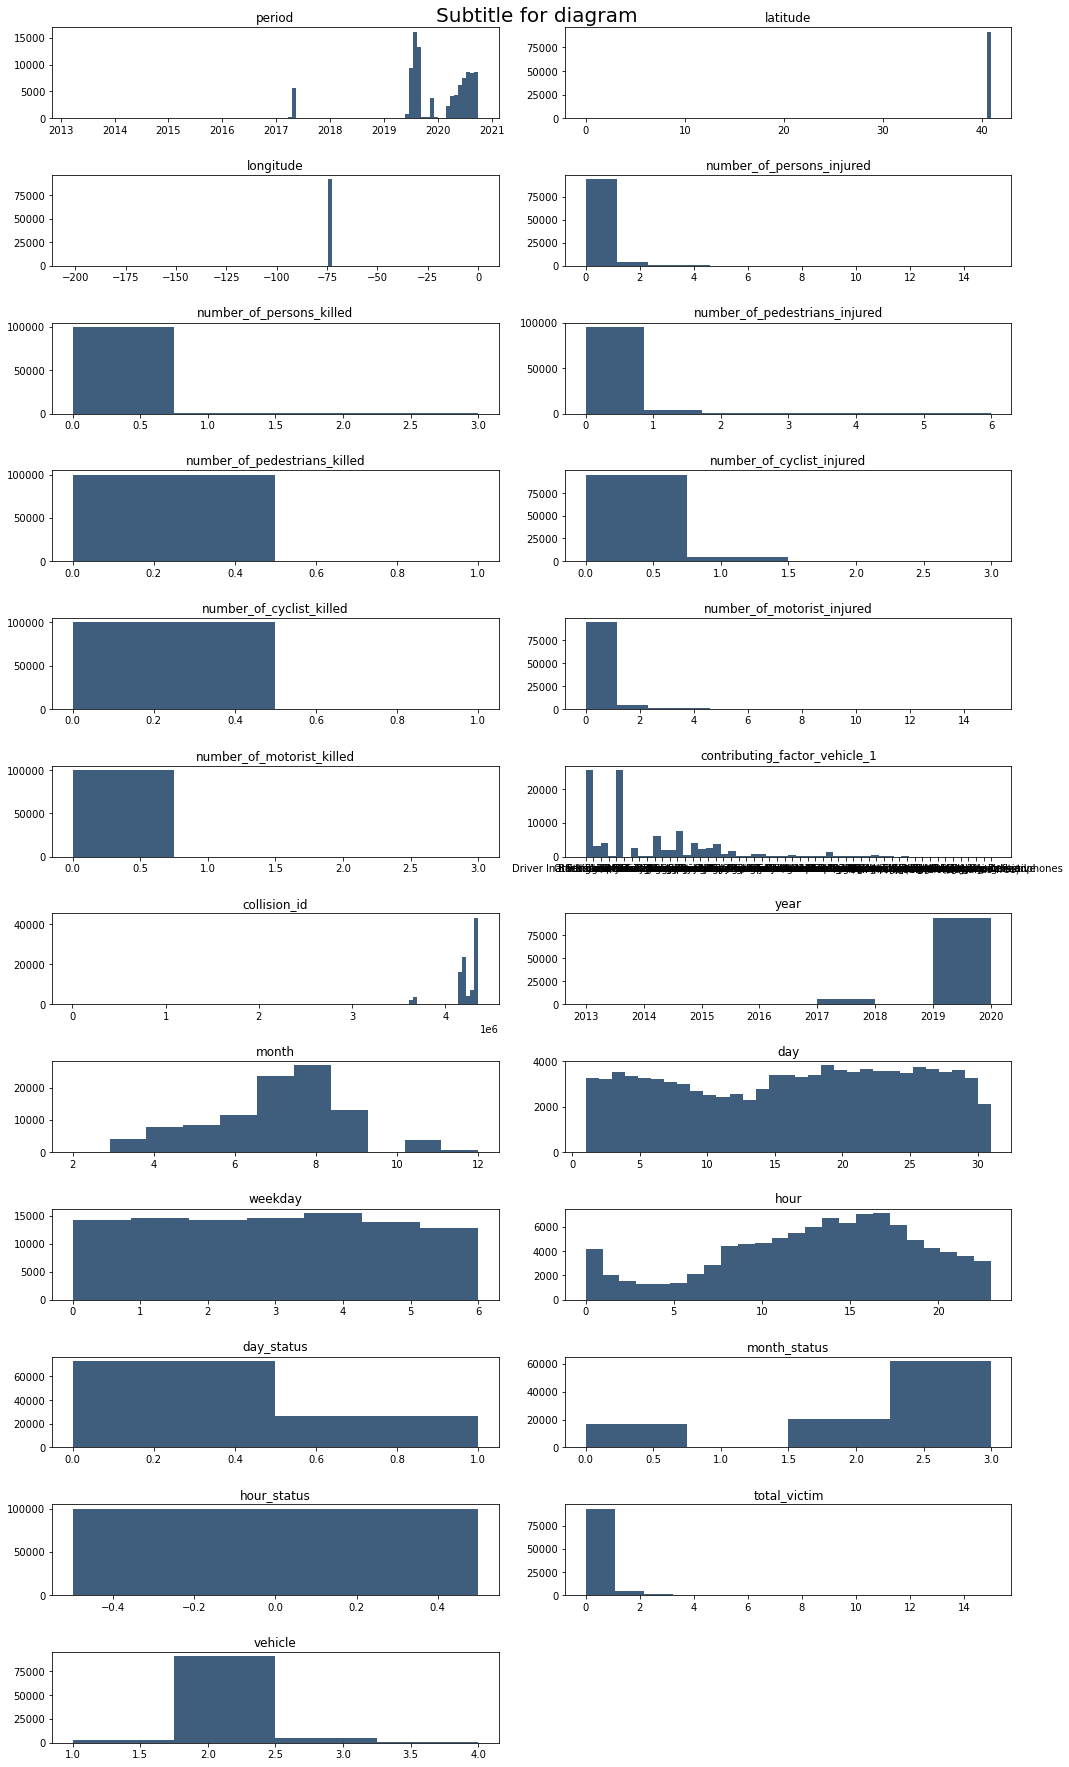

In [67]:
column_headers = df.columns
dataset2 = df
feature_col = dataset2.shape[1]
plt_col = 2
plt_row = int((len(column_headers)/plt_col) + 1)


fig = plt.figure(figsize=(15, 25))
plt.suptitle('Subtitle for diagram', fontsize=20)
for i in range(feature_col):
    plt.subplot(plt_row, plt_col, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())
    
    # This help ploting process easier
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_tight_layout(True)

## Correlation between every columns with each other

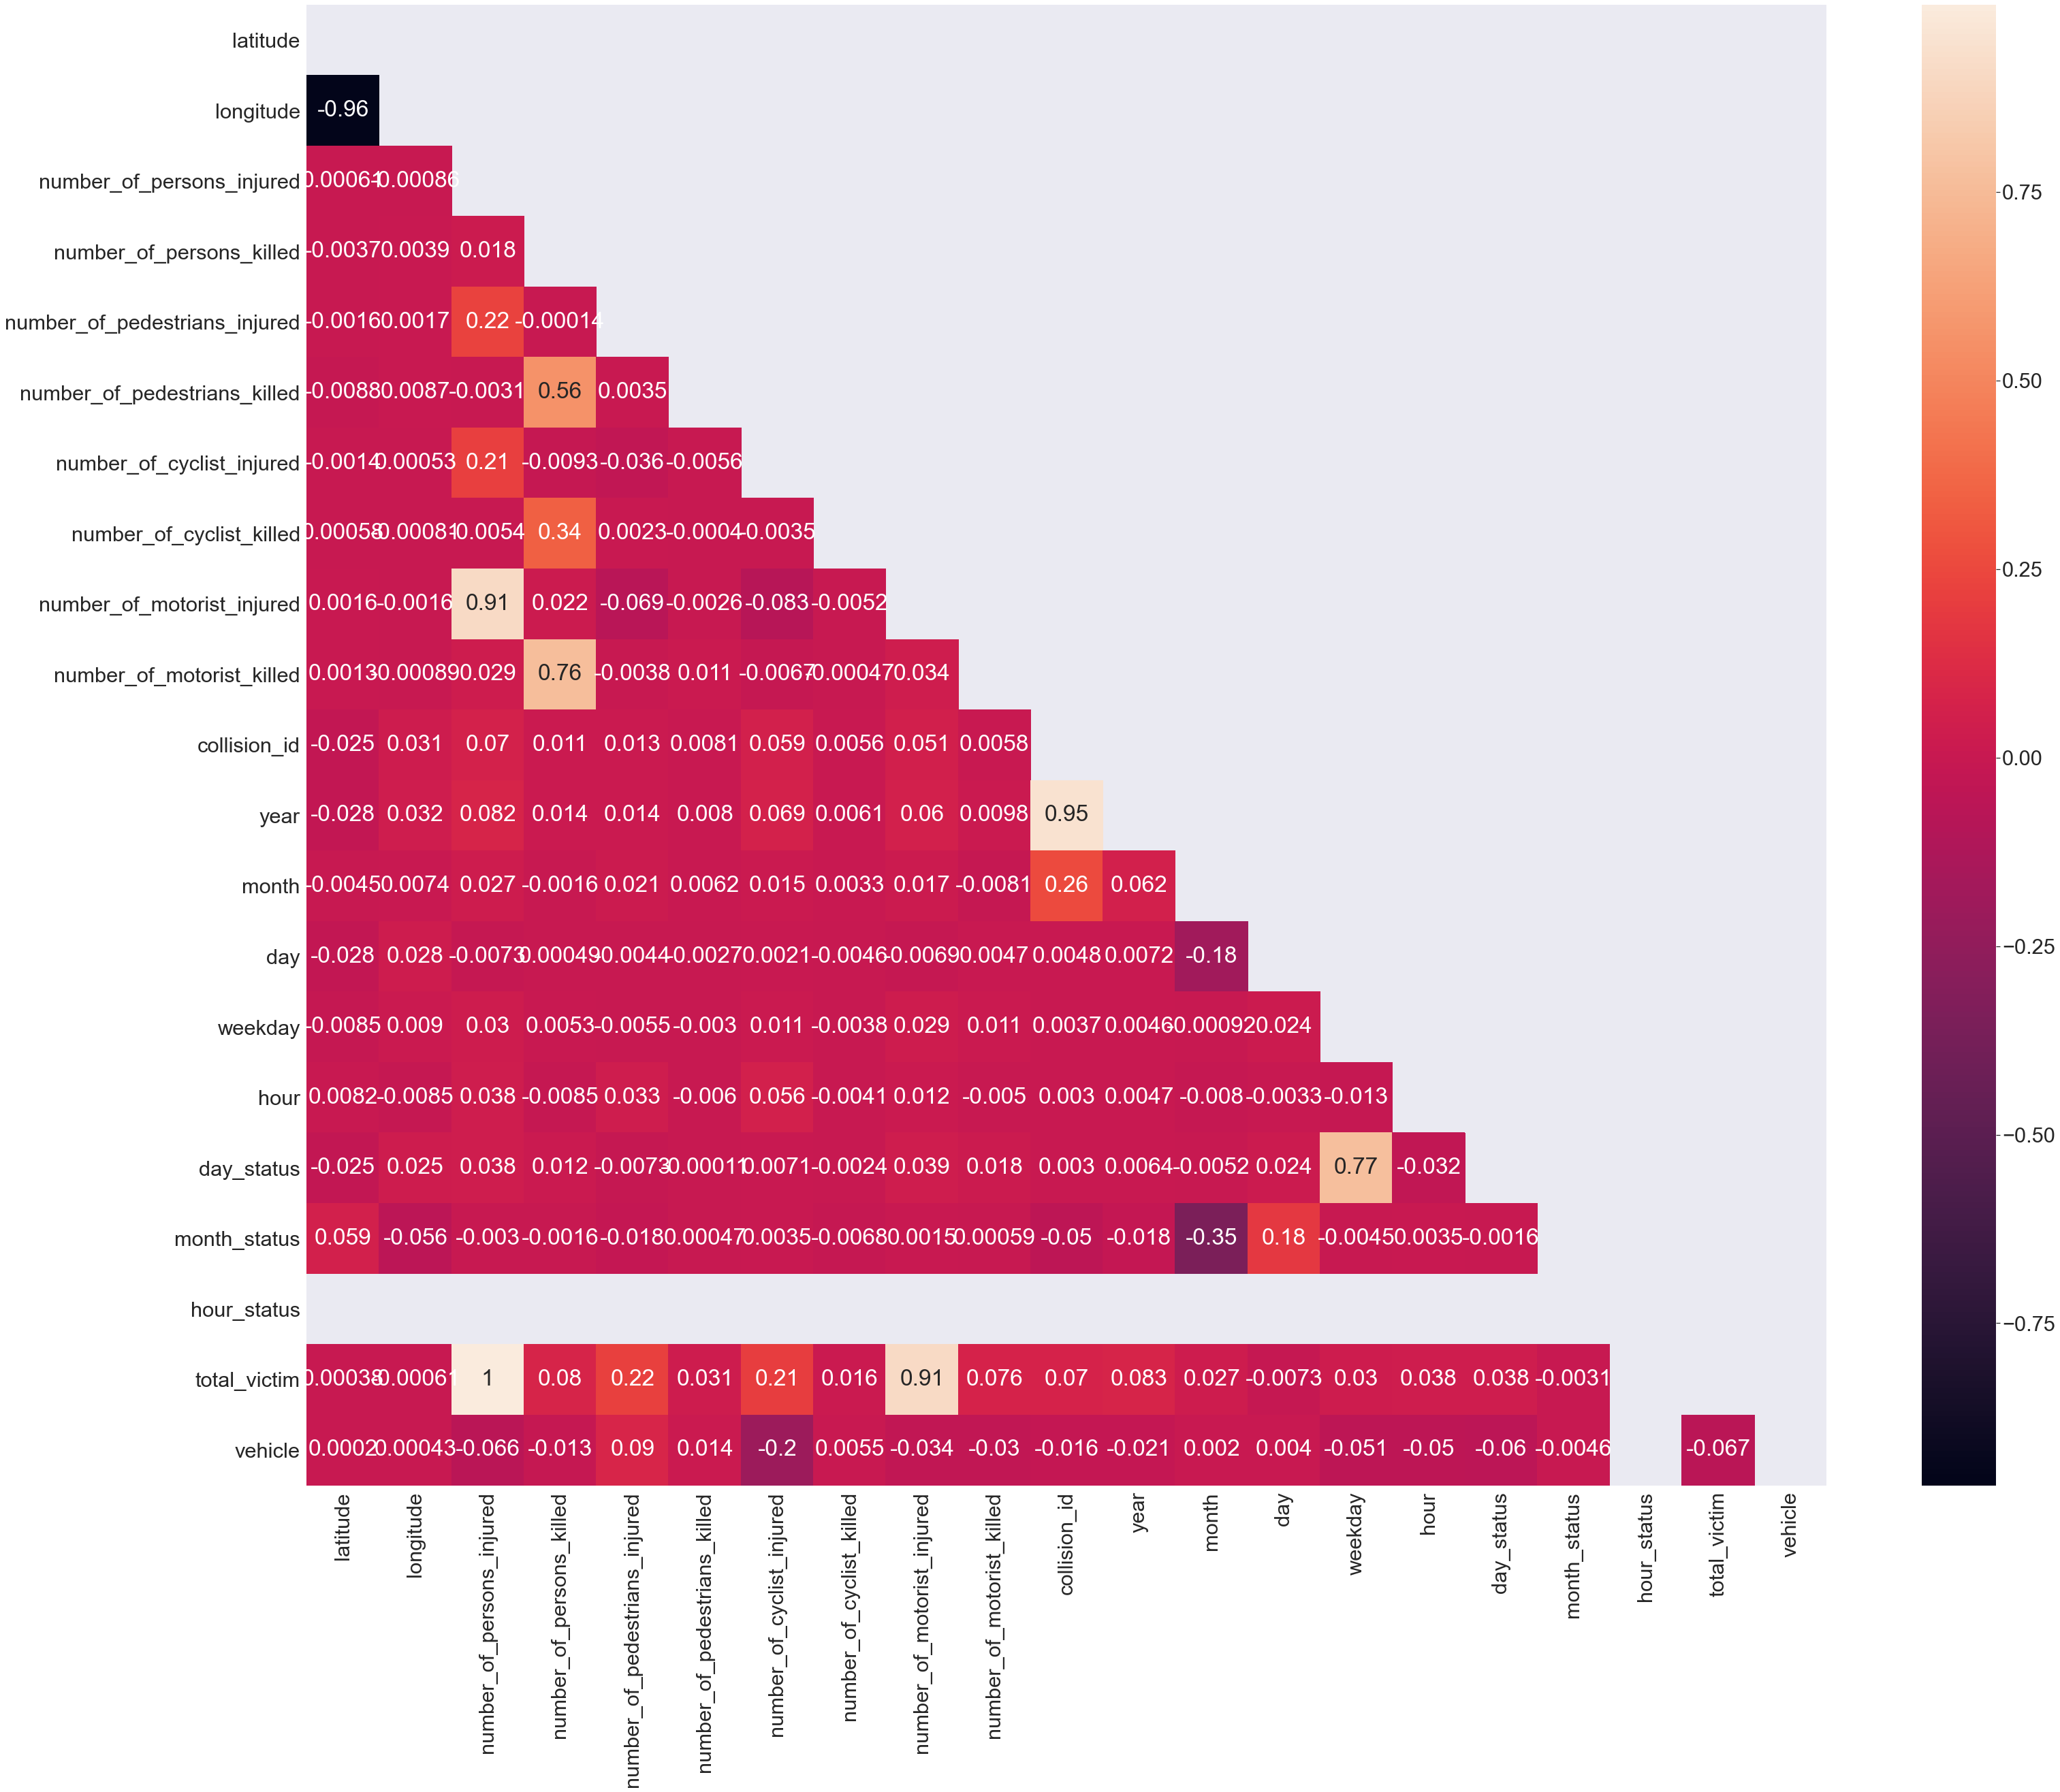

In [68]:
## Correlation every feature
corr = df.corr()
sn.set(font_scale=2.8)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,40))
sn.heatmap(corr, annot=True,mask=mask);

## Individual column correlation with other column.

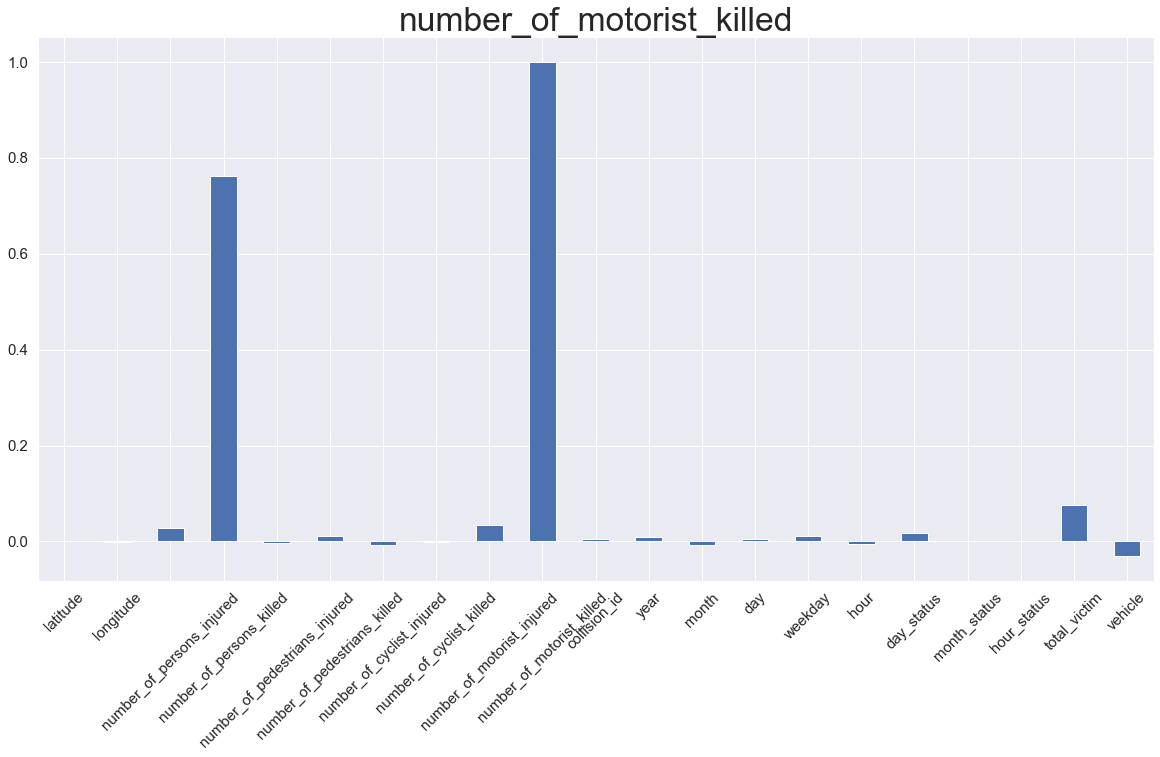

In [69]:
## Correlation with independent variable (Note: Models like RF are not linear like these)

fig = "number_of_motorist_killed"
df.corrwith(df[f"{fig}"]).plot.bar(figsize = (20, 10), 
                                                        title = f"{fig}",
                                                        fontsize = 15,
                                                        rot = 45, grid = True);